In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [170]:
#IMPORT DATASET
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [171]:
#menampilkan data frame
print(data_train.head())

print("shape dataset train" + " " + str(data_train.shape))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [172]:
#pengecekkan nilai null pada data_train
print(data_train.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [173]:
data_train.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

AxesSubplot(0.125,0.125;0.62x0.755)


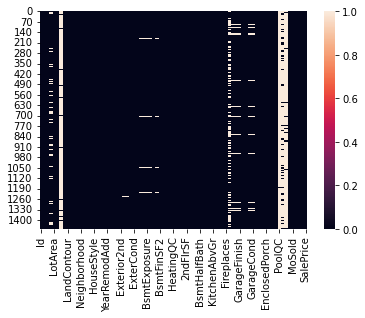

In [174]:
# jika visualisasinya menunjukkan banyak garis putih, maka banyak null pada kolom tersebut
print(sns.heatmap(data_train.isna()))


In [175]:
data_train.drop(['Id','Alley','PoolQC','Fence','MiscFeature','GarageYrBlt'], axis = 1, inplace = True)

In [176]:
#karena terlalu banyak null pada beberapa kolom, jadi gak bagus untuk lngsung di drop row atau column
#brrti yg null diisi dengan nilai rata pada kolom yg ada null nya
print("Rata-Rata Nilai pada LotFrontage:" + " " +
      str((data_train['LotFrontage'].mean())))
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(
    data_train['LotFrontage'].mean())

data_train['BsmtCond']=data_train['BsmtCond'].fillna(data_train['BsmtCond'].mode()[0])

data_train['BsmtQual']=data_train['BsmtQual'].fillna(data_train['BsmtQual'].mode()[0])

data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna(data_train['BsmtFinType2'].mode()[0])

data_train['FireplaceQu']=data_train['FireplaceQu'].fillna(data_train['FireplaceQu'].mode()[0])

data_train['GarageType'] = data_train['GarageType'].fillna(data_train['GarageType'].mode()[0])

data_train['GarageFinish'] = data_train['GarageFinish'].fillna(data_train['GarageFinish'].mode()[0])

data_train['GarageQual'] = data_train['GarageQual'].fillna(data_train['GarageQual'].mode()[0])

data_train['GarageCond'] = data_train['GarageCond'].fillna(data_train['GarageCond'].mode()[0])


Rata-Rata Nilai pada LotFrontage: 70.04995836802665


In [177]:
data_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

AxesSubplot(0.125,0.125;0.62x0.755)


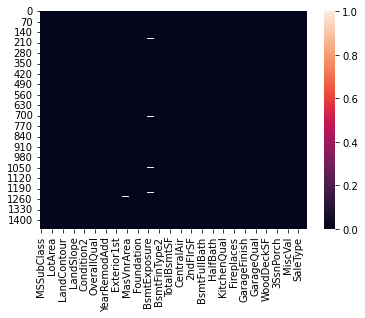

In [178]:
print(sns.heatmap(data_train.isna()))


In [179]:
data_train.dropna(inplace=True)

AxesSubplot(0.125,0.125;0.62x0.755)


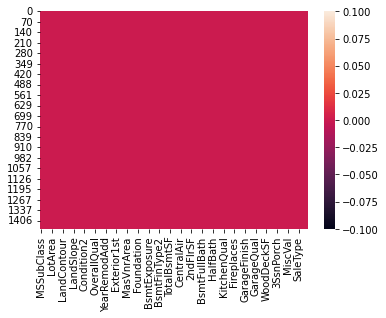

In [180]:
#heatmap setelah pembersihan data null
print(sns.heatmap(data_train.isna()))


In [181]:
data_train.shape


(1413, 75)

In [183]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


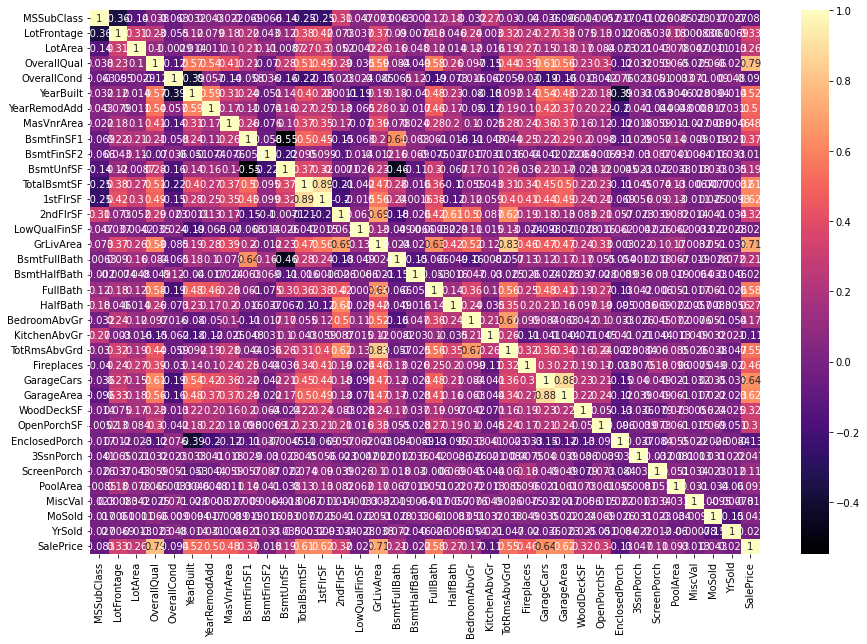

In [184]:
plt.figure(figsize=(15,10))
sns.heatmap(data_train.corr(), cmap='magma', annot=True)
plt.show()